In [39]:
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("S05-hw-dataset.csv")

In [41]:
display(df.head())
df.info()
display(df.describe())
display(df['default'].value_counts(normalize=True))

"""
Датасет содержит 3000 строк и 17 признаков, все столбцы полностью заполнены.
Явные аномалии не обнаружены.
В целевой признак default 59 процентов объектов относятся к классу 0 и 41 процент к классу 1.
"""

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

'\nДатасет содержит 3000 строк и 17 признаков, все столбцы полностью заполнены.\nЯвные аномалии не обнаружены.\nВ целевой признак default 59 процентов объектов относятся к классу 0 и 41 процент к классу 1.\n'

In [42]:
y = df['default']
X = df.drop(columns=['client_id', 'default'])

X.dtypes  # просмотр типов столбцов

age                                 int64
income                              int64
years_employed                      int64
credit_score                        int64
debt_to_income                    float64
num_credit_cards                    int64
num_late_payments                   int64
has_mortgage                        int64
has_car_loan                        int64
savings_balance                     int64
checking_balance                    int64
region_risk_score                 float64
phone_calls_to_support_last_3m      int64
active_loans                        int64
customer_tenure_years               int64
dtype: object

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)

y_pred = dummy.predict(X_test)
y_proba = dummy.predict_proba(X_test)[:, 1]

acc_dummy = accuracy_score(y_test, y_pred)
roc_auc_dummy = roc_auc_score(y_test, y_proba)

print("DummyClassifier baseline")
print(f"Accuracy: {acc_dummy:.4f}")
print(f"ROC-AUC: {roc_auc_dummy:.4f}")

"""
Бейзлайн показывает качество, которое можно получить, не используя информацию из признаков.
Сравнение другиъ моделей с таким базовым уровнем позволяет понимать, есть ли реальный выигрыш от построения классификатора
"""

DummyClassifier baseline
Accuracy: 0.5900
ROC-AUC: 0.5000


'\nБейзлайн показывает качество, которое можно получить, не используя информацию из признаков.\nСравнение другиъ моделей с таким базовым уровнем позволяет понимать, есть ли реальный выигрыш от построения классификатора\n'

In [44]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

param_grid = {
    "logreg__C": [0.01, 0.1, 1.0, 10.0],
    "logreg__penalty": ["l2"],
    "logreg__solver": ["lbfgs"]
}

grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)
print("Лучший ROC-AUC:", grid.best_score_)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

acc_log = accuracy_score(y_test, y_pred)
roc_auc_log = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {acc_log:.4f}")
print(f"ROC-AUC: {roc_auc_log:.4f}")

Лучшие параметры: {'logreg__C': 10.0, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Лучший ROC-AUC: 0.8606590016322577
Accuracy: 0.8000
ROC-AUC: 0.8756


D:\Project_university\Artificial-Intelligence-Engineering\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


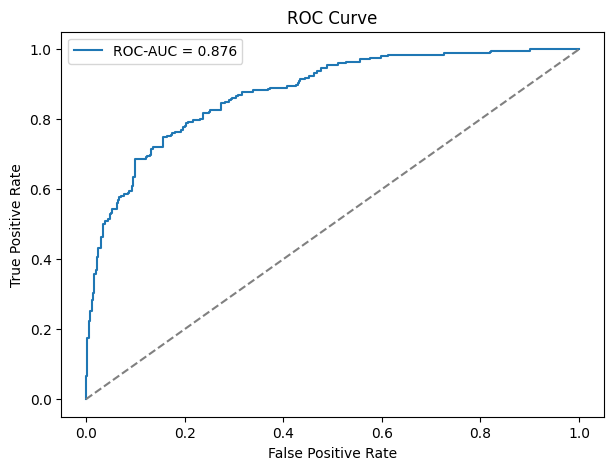

In [45]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.savefig("figures/roc.png", dpi=150)
plt.show()


In [46]:
import pandas as pd

results = pd.DataFrame({
    "Accuracy": [acc_dummy, acc_log],
    "ROC-AUC": [roc_auc_dummy, roc_auc_log]
}, index=["Dummy", "LogisticRegression"])

display(results)
"""
Бейзлайн-модель, предсказывающая наиболее частый класс, показывает низкое качество, ее accuracy равна доле нулевого класса, а ROC-AUC равен 0.5, то есть угадыванию.
Логистическая регрессия показала результаты гораздо лучше бейзлайна. Accuracy увеличилась с 0.59 до 0.80, а ROC-AUC - с 0.50 до 0.88, что доказывает что регерссия справилась лчуше.
При подборе C оказалось, что C=10 дает лучший результат, вероятно из-за большего учета структуры данных.
Логистическая регрессия выглядит разумной моделью для данной задачи, так как дает заметный прирост качества при низкой сложности и высокой скорости.
"""

,Accuracy,ROC-AUC
Dummy,0.59,0.500000
LogisticRegression,0.80,0.875637


'\nБейзлайн-модель, предсказывающая наиболее частый класс, показывает низкое качество, ее accuracy равна доле нулевого класса, а ROC-AUC равен 0.5, то есть угадыванию.\nЛогистическая регрессия показала результаты гораздо лучше бейзлайна. Accuracy увеличилась с 0.59 до 0.80, а ROC-AUC - с 0.50 до 0.88, что доказывает что регерссия справилась лчуше.\nПри подборе C оказалось, что C=10 дает лучший результат, вероятно из-за большего учета структуры данных.\nЛогистическая регрессия выглядит разумной моделью для данной задачи, так как дает заметный прирост качества при низкой сложности и высокой скорости.\n'